<a href="https://colab.research.google.com/github/Abhilitcode/IMDB_Movie_Review_Sentiment_Analyzer/blob/main/IMDb_Movie_Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/sample_data/IMDB Dataset.csv")

In [3]:
data.shape

(50000, 2)

In [4]:
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
data.tail()

review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

In [6]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

How to Identify the Problem Type:
If the output is categorical (e.g., classes or labels): It’s a classification problem.
If the output is a continuous numerical value (e.g., prices, scores): It’s a regression problem.
If there is no output label and you are trying to find natural groupings in the data: It’s a clustering problem.
In the case of your IMDb sentiment analysis project, since the task is to predict whether a review is positive or negative (a categorical label), it is clearly a classification problem.

In [8]:
#to apply one hot encoder we need make our output class convert to numerical
data.replace({'sentiment':{'positive':1, 'negative':0}}, inplace=True)

In [9]:
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [10]:
data.tail()

review  sentiment
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

The reason to **limit the vocabulary to 5000 words** (or any fixed number) when training a model like an RNN is primarily about **performance** and **efficiency**. Here are some key reasons why we choose a limited vocabulary size:

### 1. **Reduce Complexity:**
   - Text data can contain tens or hundreds of thousands of unique words. Using all of them can make your model excessively complex, increasing the number of parameters and making the model harder to train.
   - By limiting the vocabulary to the **most frequent 5000 words**, you reduce the dimensionality of the input data, which helps the model focus on the most commonly used words that carry the most information.

### 2. **Handle Rare Words:**
   - In any dataset, there are many words that occur only a few times (often referred to as **rare words**). These words are less important for learning the overall sentiment or meaning of the reviews.
   - Including rare words in the model may not add much value but can increase the size and complexity of the model. Rare words are usually replaced with a special token (`<OOV>` or out-of-vocabulary token) during tokenization.

### 3. **Improve Training Efficiency:**
   - Reducing the vocabulary size makes the **embedding layer** and the overall model smaller. This reduces **memory usage** and speeds up **training time**.
   - A smaller vocabulary means faster lookup in the embedding layer and fewer computations overall.

### 4. **Prevent Overfitting:**
   - Using too large of a vocabulary might lead to **overfitting** on rare words or noise in the dataset, which could cause the model to memorize rather than generalize.
   - Limiting the vocabulary size helps the model generalize better by focusing on the most important words rather than trying to learn noise.

### 5. **Most Words Have Minimal Impact:**
   - In many NLP tasks, the most frequent words cover the majority of the useful information. For example, in sentiment analysis, words like "excellent," "bad," "love," or "hate" tend to appear frequently and carry strong sentiment, while rare words might not affect the overall prediction as much.
   - **Zipf's Law** suggests that in natural language, a small number of words occur very frequently, while the vast majority of words are rare. Focusing on these frequent words captures most of the language's expressive power.

### How to Decide on the Number (e.g., 5000):
   - The number 5000 is a common choice because it usually balances **coverage** (most frequent words) and **efficiency**. However, this number can vary based on your dataset size and the task.
   - You can experiment with larger or smaller vocabulary sizes, depending on your dataset:
     - For a **small dataset**, 5000 may be enough.
     - For larger datasets, you may want to increase it to 10,000 or more.
     - A good starting point is to examine your dataset's word distribution to see how many words cover a majority of occurrences.

### Trade-offs:
- **Smaller Vocabulary:**
  - Pros: Faster training, less memory usage, fewer overfitting risks.
  - Cons: Might lose some nuanced meaning if the vocabulary is too small.
  
- **Larger Vocabulary:**
  - Pros: Can capture more complex or nuanced expressions in the data.
  - Cons: Increases model complexity, training time, and risk of overfitting on rare words.

You can adjust this number based on the performance of your model and the nature of your dataset.

In [13]:
data['review'].values

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [14]:
tokenizer = Tokenizer(num_words=5000) #lets get the top 5000 words that gives us the most information

In [15]:
tokenizer.fit_on_texts(data['review'].values)

In [16]:
sequences = tokenizer.texts_to_sequences(data['review'].values)

In [17]:
sequences

[[27,
  4,
  1,
  79,
  2102,
  45,
  1072,
  12,
  100,
  147,
  39,
  307,
  3184,
  398,
  474,
  26,
  3195,
  33,
  23,
  203,
  14,
  11,
  6,
  621,
  48,
  596,
  16,
  68,
  7,
  7,
  1,
  86,
  148,
  12,
  3241,
  68,
  42,
  3184,
  13,
  92,
  2,
  134,
  4,
  570,
  60,
  268,
  8,
  203,
  36,
  1,
  661,
  139,
  1740,
  68,
  11,
  6,
  21,
  3,
  119,
  15,
  1,
  2333,
  38,
  11,
  119,
  2595,
  54,
  16,
  5,
  1479,
  376,
  38,
  570,
  92,
  6,
  3804,
  8,
  1,
  360,
  356,
  4,
  1,
  661,
  7,
  7,
  9,
  6,
  433,
  3184,
  14,
  12,
  6,
  1,
  358,
  5,
  1,
  2538,
  1064,
  9,
  2711,
  1421,
  20,
  538,
  32,
  4636,
  2468,
  4,
  1,
  1208,
  117,
  29,
  1,
  25,
  2970,
  2,
  391,
  34,
  6,
  21,
  299,
  20,
  1,
  4910,
  538,
  6,
  344,
  5,
  106,
  2453,
  2,
  51,
  34,
  327,
  2,
  23,
  110,
  225,
  243,
  7,
  7,
  10,
  58,
  131,
  1,
  280,
  1324,
  4,
  1,
  119,
  6,
  693,
  5,
  1,
  192,
  12,
  9,
  269,
  117,
  79,
  276

In [18]:
#check the mapping of words and index assigned to them
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

In [19]:
len_inp_seq = [len(x) for x in sequences]

In [20]:
len_inp_seq

[275,
 147,
 157,
 133,
 210,
 112,
 147,
 166,
 121,
 32,
 94,
 174,
 347,
 115,
 45,
 131,
 137,
 216,
 120,
 118,
 264,
 186,
 64,
 317,
 148,
 108,
 538,
 134,
 116,
 540,
 312,
 300,
 92,
 551,
 246,
 354,
 93,
 294,
 111,
 243,
 117,
 190,
 163,
 223,
 169,
 223,
 64,
 114,
 624,
 90,
 378,
 569,
 144,
 69,
 160,
 191,
 209,
 147,
 415,
 395,
 166,
 144,
 83,
 44,
 161,
 278,
 287,
 136,
 186,
 293,
 189,
 251,
 220,
 172,
 225,
 147,
 270,
 563,
 100,
 277,
 145,
 138,
 236,
 405,
 73,
 145,
 284,
 135,
 167,
 327,
 154,
 184,
 351,
 151,
 123,
 235,
 171,
 127,
 187,
 481,
 132,
 704,
 136,
 230,
 177,
 190,
 102,
 277,
 148,
 113,
 135,
 180,
 39,
 85,
 247,
 120,
 278,
 79,
 91,
 255,
 120,
 140,
 182,
 140,
 132,
 117,
 384,
 119,
 203,
 119,
 186,
 401,
 138,
 120,
 172,
 389,
 91,
 223,
 259,
 257,
 347,
 262,
 547,
 76,
 227,
 299,
 199,
 265,
 134,
 278,
 134,
 163,
 155,
 175,
 192,
 86,
 710,
 132,
 125,
 112,
 53,
 200,
 70,
 436,
 354,
 70,
 116,
 203,
 116,
 328,
 2

In [21]:
max_len_inp = max([len(x) for x in sequences])

In [22]:
max_len_inp

2119

In [47]:
X.shape

(50000, 200)

In [48]:
y.shape

(50000,)

In [49]:
len(tokenizer.word_index)

124252

data['review'].str.split() splits each review into words.
.apply(len) calculates the length of each split review (i.e., the number of words).

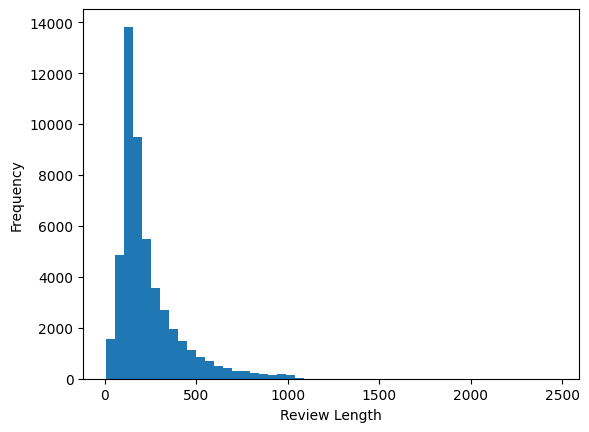

Percentage of reviews under 200 words: 59.14%


In [23]:
# Calculate the length of each review
review_lengths = data['review'].apply(lambda x: len(x.split()))

# Plot a histogram of review lengths
import matplotlib.pyplot as plt
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Check the percentage of reviews under 200 words
percentage_under_200 = (review_lengths <= 200).mean() * 100
print(f"Percentage of reviews under 200 words: {percentage_under_200:.2f}%")


The plot you’ve shared is a **histogram of review lengths** for the IMDb dataset. Here's what it shows:

1. **X-axis (Review Length)**: This represents the number of words in each review. The range goes from 0 to around 2500 words, though most reviews seem to have much shorter lengths.
   
2. **Y-axis (Frequency)**: This represents how many reviews fall into each length range. For example, there is a large peak around the shorter review lengths, indicating that many reviews have relatively few words.

### Interpretation:
- The highest bar is around 0 to 200 words, showing that **most reviews are quite short**, typically under 200 words.
- The frequency drops sharply after 500 words, indicating that **very few reviews exceed 500 words**.
- There are some reviews that are much longer (up to around 2000+ words), but they are **outliers**.

### Why Limit the Sequence Length to 200?
From this histogram, it is clear that:
- A large number of reviews are much shorter than 200 words.
- Limiting the maximum sequence length to 200 will cover most of the reviews while ignoring only a few outliers with very long reviews.
  
This justifies why we might choose to pad/truncate reviews to 200 words, as it's a good balance between keeping important information and optimizing computation time.


 Pad the sequences so that all are of equal length

In [24]:
X = pad_sequences(sequences, maxlen =200)

In [25]:
X

array([[3804,    8,    1, ...,  125, 4103,  486],
       [   0,    0,    0, ..., 1977,   69,  221],
       [   0,    0,    0, ...,   63,   16,  350],
       ...,
       [ 299,  368, 1123, ..., 1957,    2,    2],
       [   0,    0,    0, ...,   67,  739,   42],
       [   0,    0,    0, ...,  794,   11,   17]], dtype=int32)

In [26]:
y = data['sentiment'].values

In [27]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, LSTM, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape=(200,)))

In [ ]:
model.add(Embedding(input_dim=5000, output_dim=128))

# RNN layer: Simple RNN with 64 units
model.add(SimpleRNN(128, return_sequences=True))
model.add(SimpleRNN(128))

# Output layer: A single neuron with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 200, 128)            │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705,921 (2.69 MB)

 Trainable params: 705,921 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

The `output_dim` parameter in the `Embedding` layer defines the **dimensionality of the word embeddings**, which is essentially the size of the vector representation for each word. The choice of `output_dim` (also referred to as the embedding size or embedding dimension) can impact your model’s performance, but it’s generally decided based on several factors, such as the complexity of the task, size of the dataset, and available resources.

Here’s how to think about choosing `output_dim`:

### 1. **Understanding the Role of `output_dim`:**
   - Each word in your vocabulary will be mapped to a vector of size `output_dim`. These vectors represent the semantic meaning of the words in a continuous vector space, and words with similar meanings tend to have similar embeddings.
   - A higher `output_dim` means each word is represented with more features (more detailed representation), but it also increases the complexity of the model.

### 2. **Common Choices for `output_dim`:**
   - Typical values for `output_dim` range from **50 to 300** in many applications. However, the exact value depends on your problem. Here are some rough guidelines:
     - **Small datasets or less complex tasks**: Use a smaller `output_dim` (e.g., 50–100).
     - **Large datasets or more complex tasks**: Use a larger `output_dim` (e.g., 100–300).

### 3. **Choosing `output_dim`:**
   Here’s how you might decide:
   - **Small text classification task**: You might start with a smaller embedding size like 50 or 100. Smaller embeddings reduce computation and are often sufficient for simple tasks.
   - **More complex text tasks**: For tasks that involve longer or more complex text, like sentiment analysis, machine translation, or language modeling, an embedding size of **128, 256, or even 300** could be more appropriate.
   - **Memory and computation**: Larger embeddings use more memory and computation resources. If your dataset is small or if you’re constrained by hardware limitations, start with a smaller `output_dim` and experiment with larger values only if necessary.
  
   In your case, since you're using a fairly common setup for **sentiment analysis** with 50,000 movie reviews (IMDB dataset), a value like `128` for `output_dim` is a reasonable starting point.

### 4. **Empirical Tuning**:
   - Start with a default value, like `128` (which you’ve already used).
   - If your model is underfitting (i.e., not learning well), consider increasing `output_dim` to give the model more expressive power.
   - If your model is overfitting (i.e., performs well on the training data but poorly on validation data), you might try decreasing `output_dim` or using other regularization techniques.

### Example Explanation for Your Code:
In the following code:
```python
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
```
- `input_dim=5000`: You are considering a vocabulary size of 5,000 (i.e., the top 5,000 words based on frequency).
- `output_dim=128`: Each word is represented by a 128-dimensional vector. This is a standard size for tasks like text classification and should work well as a starting point.
- `input_length=200`: You are truncating or padding your sequences to a length of 200 words per review.

### Summary:
- For **text classification tasks**, a common `output_dim` is between **50 and 300**.
- **128** is a reasonable choice for sentiment analysis on a dataset like IMDb.
- **Experimentation**: You may want to experiment with different values of `output_dim` based on model performance.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 223ms/step - accuracy: 0.5065 - loss: 0.7150 - val_accuracy: 0.5143 - val_loss: 0.6915
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 220ms/step - accuracy: 0.5249 - loss: 0.6889 - val_accuracy: 0.6244 - val_loss: 0.6278
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 219ms/step - accuracy: 0.6728 - loss: 0.5930 - val_accuracy: 0.7507 - val_loss: 0.5189
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 220ms/step - accuracy: 0.7572 - loss: 0.5035 - val_accuracy: 0.7517 - val_loss: 0.5105
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 219ms/step - accuracy: 0.7562 - loss: 0.5127 - val_accuracy: 0.6668 - val_loss: 0.6185


In [64]:
lstm_model = Sequential()

In [65]:
lstm_model.add(Input(shape=(200,)))

In [66]:
lstm_model.add(Embedding(input_dim =5000, output_dim = 128))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation = "sigmoid"))

In [67]:
lstm_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
from keras.callbacks import EarlyStopping

In [61]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [98]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.9066 - loss: 0.2357 - val_accuracy: 0.8758 - val_loss: 0.3023
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 249ms/step - accuracy: 0.9239 - loss: 0.2014 - val_accuracy: 0.8876 - val_loss: 0.2973
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9293 - loss: 0.1822 - val_accuracy: 0.8774 - val_loss: 0.3396
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 247ms/step - accuracy: 0.9336 - loss: 0.1710 - val_accuracy: 0.8925 - val_loss: 0.3147
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 248ms/step - accuracy: 0.9458 - loss: 0.1417 - val_accuracy: 0.8880 - val_loss: 0.3259


In [99]:
train_loss = lstm_history.history['loss']
val_loss = lstm_history.history['val_loss']
train_acc = lstm_history.history['accuracy']
val_acc = lstm_history.history['val_accuracy']

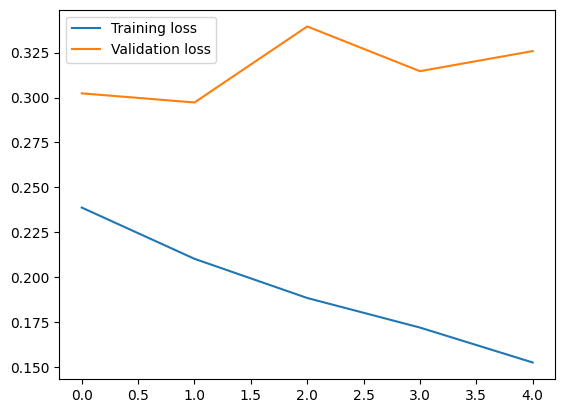

In [100]:
plt.plot(train_loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validation loss')
plt.legend()
plt.show()

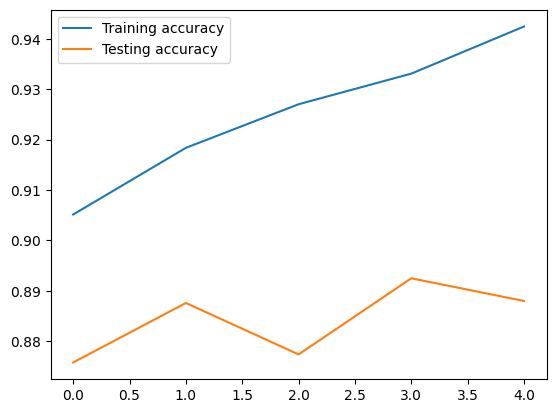

In [101]:
plt.plot(train_acc, label = 'Training accuracy')
plt.plot(val_acc, label = 'Testing accuracy')
plt.legend()
plt.show()

In [102]:
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.8874 - loss: 0.3306
Test loss: 0.3259
Test accuracy: 0.8880


In [77]:
sequence = tokenizer.texts_to_sequences(data['review'])
padded_sequence = pad_sequences(sequence, maxlen=200)


In [79]:
prediction = lstm_model.predict(padded_sequence)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step


In [83]:
prediction

array([[0.58260536],
       [0.95385337],
       [0.88159037],
       ...,
       [0.2546486 ],
       [0.33156443],
       [0.01022747]], dtype=float32)

In [85]:
prediction[0][0]

0.58260536

In [103]:
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences(data['review'])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    predictions = lstm_model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

In [104]:
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

Lets predict for new review

In [93]:
new_review = 'A wonderful little production.'
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step
The sentiment of the review is: Positive


In [105]:
#example usage
new_review = "Overall long and slow"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 85ms/step
The sentiment of the review is: positive
